<a href="https://colab.research.google.com/github/Carvas91/Carlos_Vasconez_portfolio/blob/main/Practice_Activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
  strat = df[stratify] if stratify else None
  train_set, test_set = train_test_split(df,
                                         test_size=0.4,
                                         random_state=rstate,
                                         shuffle=shuffle,
                                         stratify=strat)
  strat = test_set[stratify] if stratify else None
  val_set, test_set = train_test_split(test_set,
                                   test_size=0.5,
                                   random_state=rstate,
                                   shuffle=shuffle,
                                   stratify=strat)
  return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
  X = df.drop(label_name, axis=1)
  y = df[label_name].copy()
  return (X, y)

In [4]:
df = pd.read_csv('/content/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


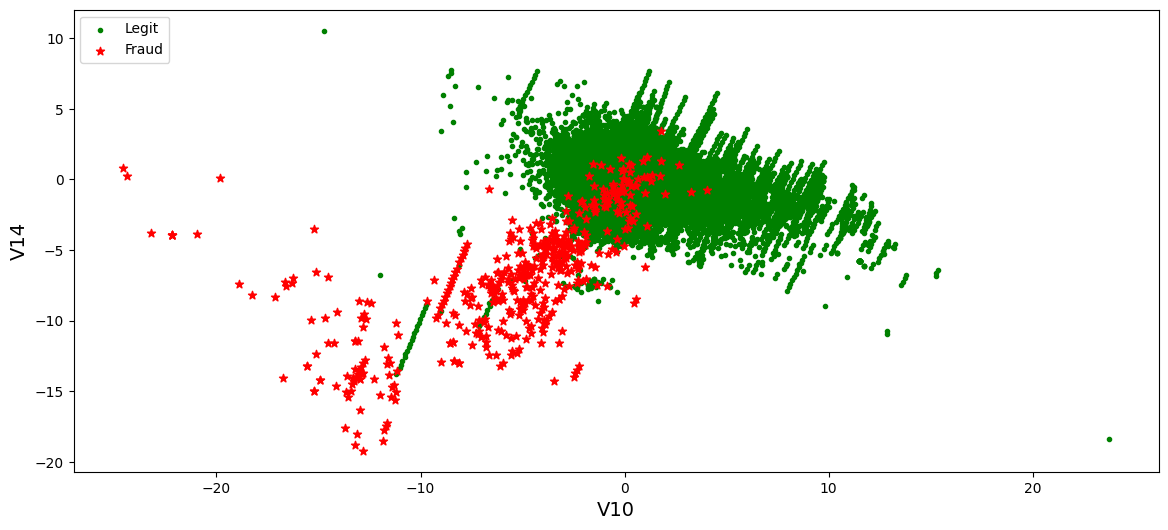

In [11]:
plt.figure(figsize=(14,6))
plt.scatter(df.V10[df.Class==0], df.V14[df.Class==0], c='g', marker='.')
plt.scatter(df.V10[df.Class==1], df.V14[df.Class==1], c='r', marker='*')
plt.xlabel('V10', fontsize=14)
plt.ylabel('V14', fontsize=14)
plt.legend(['Legit', 'Fraud'], loc='upper left')
plt.show()

In [8]:
train_set, val_set, test_set = train_val_test_split(df)

In [9]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

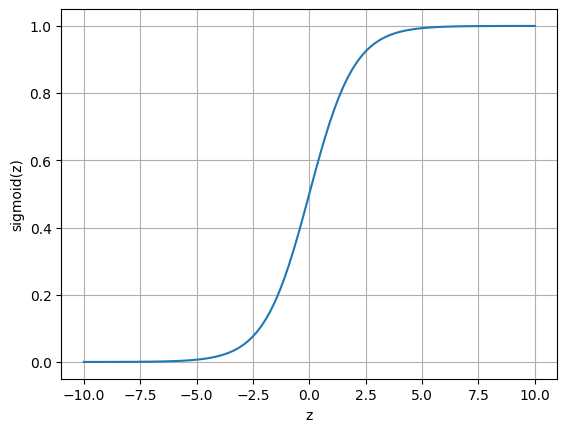

In [15]:
from tensorflow.keras.backend import sigmoid

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.show()


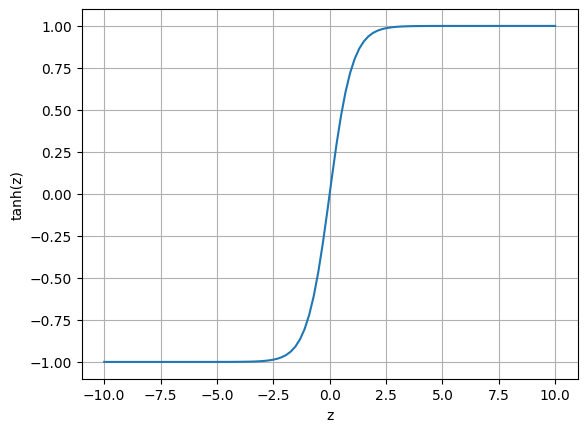

In [16]:
from tensorflow.keras.backend import tanh
z = np.linspace(-10, 10, 100)
plt.plot(z, tanh(z))
plt.xlabel('z')
plt.ylabel('tanh(z)')
plt.grid()
plt.show()

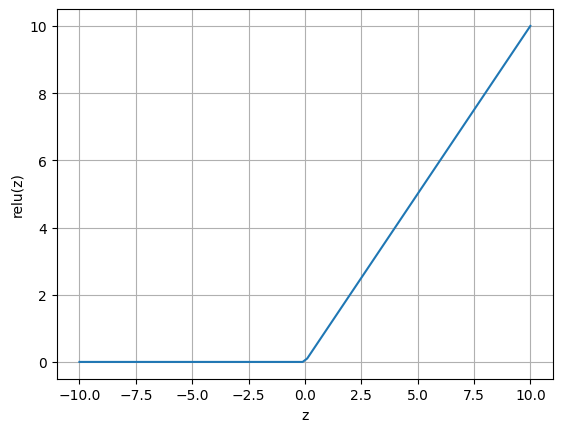

In [17]:
from tensorflow.keras.backend import relu

z= np.linspace(-10, 10, 100)
plt.plot(z, relu(z))
plt.xlabel('z')
plt.ylabel('relu(z)')
plt.grid()
plt.show()

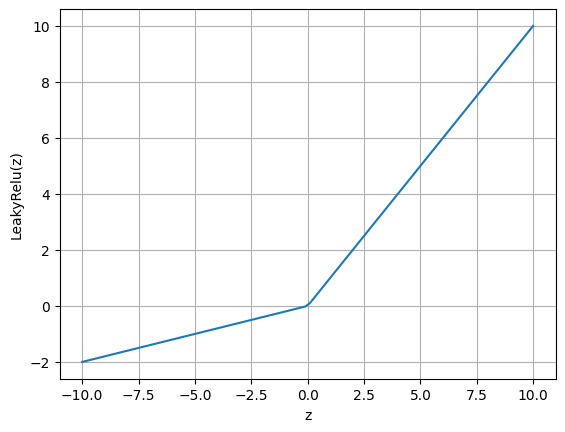

In [22]:
z = np.linspace(-10, 10, 100)
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
leaky_relu_z = leaky_relu(z)

plt.plot(z, leaky_relu_z)
plt.xlabel('z')
plt.ylabel('LeakyRelu(z)')
plt.grid()
plt.show()

In [23]:
X_train_reduced = X_train[['V10', 'V14']].copy()
X_val_reduced = X_val[['V10', 'V14']].copy()
X_test_reduced = X_test[['V10', 'V14']].copy()

In [43]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [44]:
activation = 'relu'

model = models.Sequential()
model.add(layers.Dense(128, activation=activation, input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(64, activation=activation))
model.add(layers.Dense(32, activation=activation))
model.add(layers.Dense(16, activation=activation))
model.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy', 'Precision'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
import time
start_time = time.time()

history = model.fit(X_train_reduced, y_train,
                    epochs=10,
                    validation_data=(X_val_reduced, y_val))

elapsed_time = time.time() - start_time

print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Epoch 1/10
5341/5341 [==============================] - 17s 3ms/step - loss: 0.0186 - accuracy: 0.9984 - precision: 0.6111 - val_loss: 0.0041 - val_accuracy: 0.9991 - val_precision: 0.8814
Epoch 2/10
5341/5341 [==============================] - 19s 4ms/step - loss: 0.0042 - accuracy: 0.9992 - precision: 0.8630 - val_loss: 0.0037 - val_accuracy: 0.9993 - val_precision: 0.8846
Epoch 3/10
5341/5341 [==============================] - 20s 4ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8403 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8784
Epoch 4/10
5341/5341 [==============================] - 16s 3ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8292 - val_loss: 0.0036 - val_accuracy: 0.9992 - val_precision: 0.8767
Epoch 5/10
5341/5341 [==============================] - 16s 3ms/step - loss: 0.0039 - accuracy: 0.9992 - precision: 0.8272 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8554
Epoch 6/10
5341/5341 [==============================] -

In [48]:
hidden1 = model.layers[-1]
weights, biases = hidden1.get_weights()
print(weights)

[[-0.46026418]
 [ 0.17676209]
 [-0.45705235]
 [-0.74800295]
 [ 0.11579536]
 [-0.2796583 ]
 [ 0.32599244]
 [-0.6639833 ]
 [ 0.10828266]
 [ 0.55053955]
 [ 0.13190144]
 [-0.28419358]
 [-1.0338795 ]
 [-0.33177322]
 [-0.75321156]
 [-0.2898469 ]]


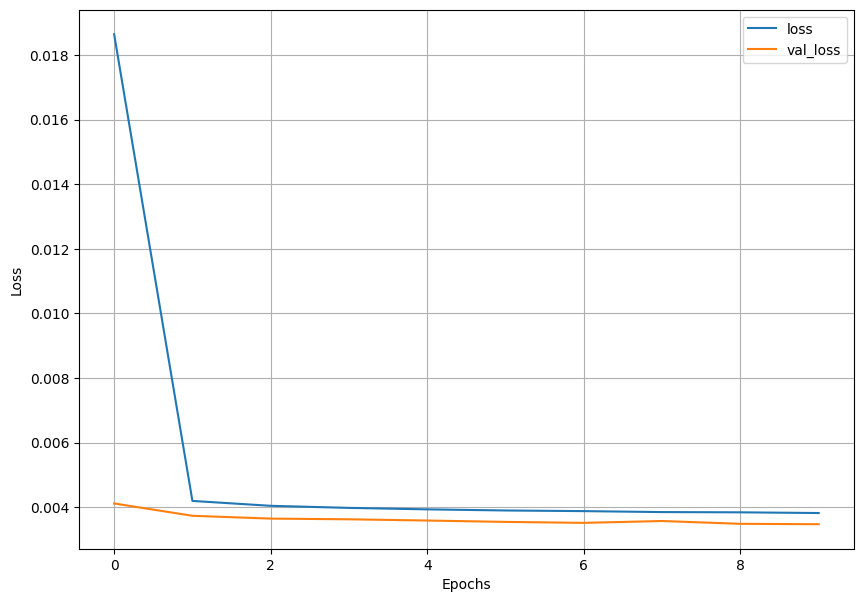

In [49]:
pd.DataFrame({'loss': history.history['loss'],\
              'val_loss': history.history['val_loss']}).plot(figsize=(10,7))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [50]:
def plot_ann_decision_boundary(X,y, model, steps=1000):
  x_min, xmax = X[:,0].min() - 1, X[:,0].max() + 1
  y_min, ymax = X[:,1].min() - 1, X[:,1].max() + 1
  steps = 1000
  x_span = np.linspace(x_min, xmax, steps)
  y_span = np.linspace(y_min, ymax, steps)
  xx, yy = np.meshgrid(x_span, y_span)

  labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = labels.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.5)
  plt.plot(X[:,0][y==0], X[:,1][y==0], 'k.', markersize=2)
  plt.plot(X[:,0][y==1], X[:,1][y==1], 'r.', markersize=2)
  plt.xlabel('V10', fontsize=14)
  plt.ylabel('V14', fontsize=14)

31250/31250 [==============================] - 56s 2ms/step


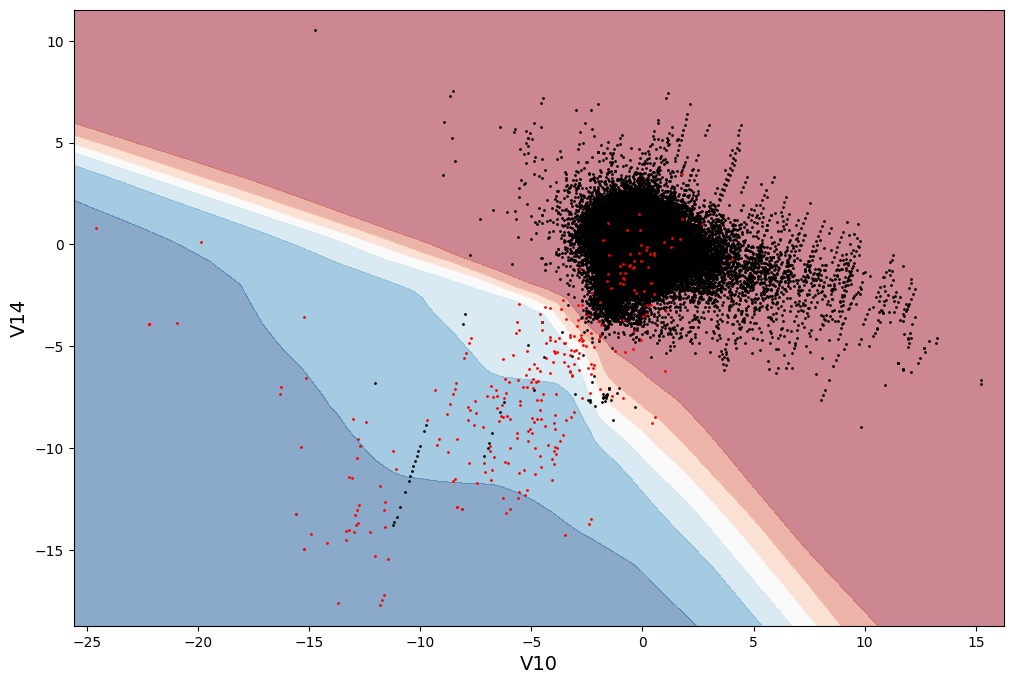

In [51]:
plt.figure(figsize=(12,8))
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.show()